# Application de la fonction de corrélation croisée correlate2D sur une image terrain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure

from scipy import signal
from scipy import misc

import matplotlib.pyplot as plt

In [2]:
band1 = np.loadtxt("band1.txt")
band2 = np.loadtxt("band2.txt")

### BAND 1 - Relevé topographique 

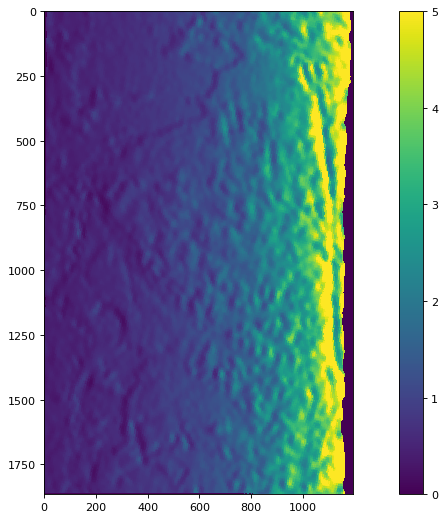

In [15]:
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(band1, vmin = 0, vmax = 5)
plt.colorbar()
plt.show()

### BAND 2 - Image satellite

<ipython-input-12-f67716d23358>:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(10*np.log(band2),vmin=-40,vmax=0)


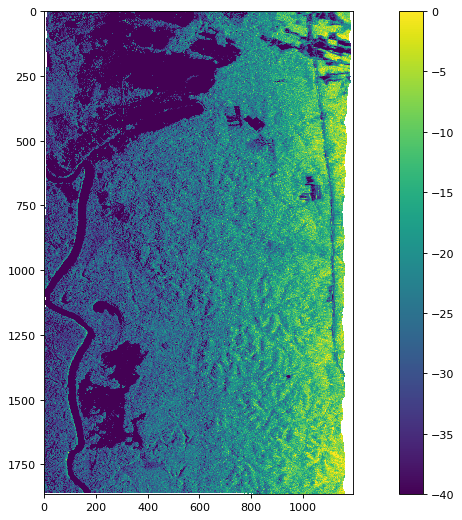

In [12]:
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(10*np.log(band2),vmin=-40,vmax=0)
plt.colorbar()
plt.show()

## ANALYSE PAR BLOC - DECALAGE D'IMAGES

Explication de l'algo -- on veut un champ de vecteurs

In [30]:
def decalageBloc(original, template):
    
    original -= original.mean()
    template -= template.mean()

    corr = signal.correlate2d(original, template, boundary='symm', mode='same')
    y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match
    
    return original, template, corr, x, y

In [31]:
def displayImg(original,template,corr,x,y):
    fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,figsize=(6, 15))
    ax_orig.imshow(original, cmap='gray')
    ax_orig.set_title('Original')
    ax_orig.set_axis_off()
    ax_template.imshow(template2, cmap='gray')
    ax_template.set_title('Template')
    ax_template.set_axis_off()
    ax_corr.imshow(corr, cmap='gray')
    ax_corr.set_title('Cross-correlation')
    ax_corr.set_axis_off()
    ax_orig.plot(x, y, 'ro')
    fig.show()
    
    figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
    print(x,y)
    plt.imshow(original)
    plt.plot(x, y, 'ro')

### Test pour un bloc 

In [32]:
original2 = band2[1000:1250,600:850]
original1 = band1[1000:1250,600:850]

template2 = original2[50:200,50:200]
template1 = original1[50:200,50:200]

In [33]:
def testBloc(original, template):
    orig,temp,corr,x,y = decalageBloc(original,template)
    displayImg(orig,temp,corr,x,y)

<ipython-input-31-608758fb5b67>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


119 110


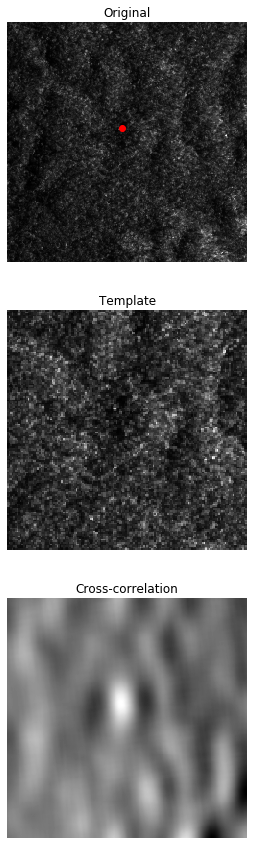

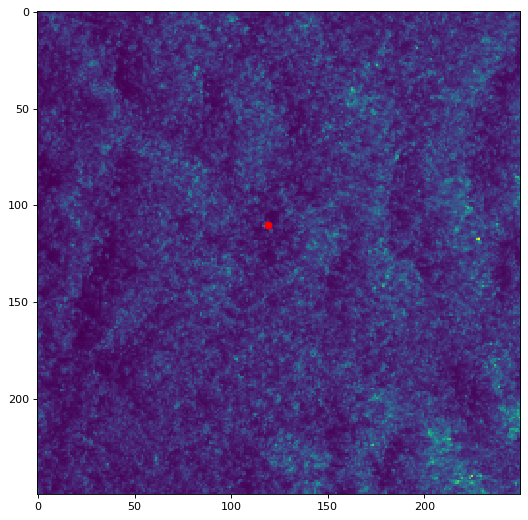

In [34]:
testBloc(original2,template1)

### Dimensions img

In [36]:
print(np.shape(band2))

(1866, 1193)


### Rognage de l'image de départ 

In [96]:
bandr1 = band1[750:1749,400:999]
bandr2 = band2[750:1749,400:999]

### PARCOURS PAR BLOC

In [97]:
def decalageImg(bandr2,bandr1):
    tabx = []
    taby = []
    for i in range(3):
        for j in range(3):
            originalBloc = bandr2[i*100:(i*100)+99,j*100:(j*100)+99]
            originalBloc2 = bandr1[i*100:i*100 +99 , j*100:j*100 +99]
            templateBloc = originalBloc2[25:75,25:75]
            
            testBloc(originalBloc,templateBloc)
            
            orig,temp,corr,x,y = decalageBloc(originalBloc,templateBloc)
            xm = x-50
            ym = y-50
            tabx.append(xm)
            taby.append(ym)
    return tabx,taby

<ipython-input-31-608758fb5b67>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-31-608758fb5b67>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


80 63
52 98


<ipython-input-31-608758fb5b67>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-31-608758fb5b67>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


39 39
59 0


<ipython-input-31-608758fb5b67>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


51 51


<ipython-input-31-608758fb5b67>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-31-608758fb5b67>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


44 5
43 36


<ipython-input-31-608758fb5b67>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-31-608758fb5b67>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


38 14
59 79


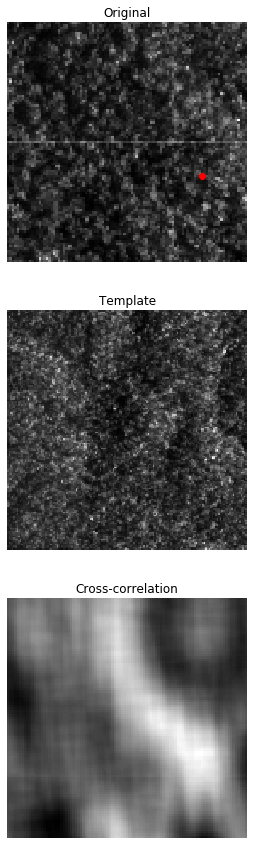

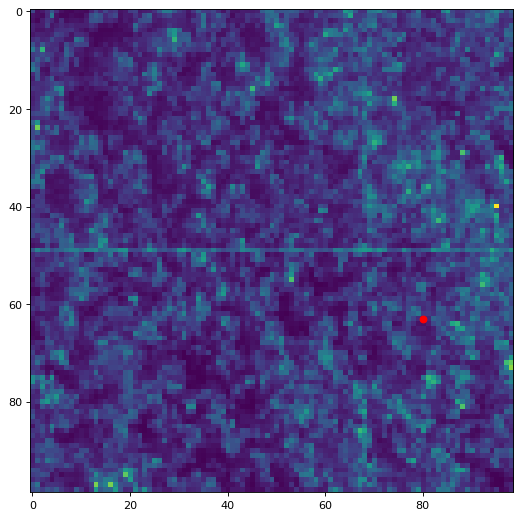

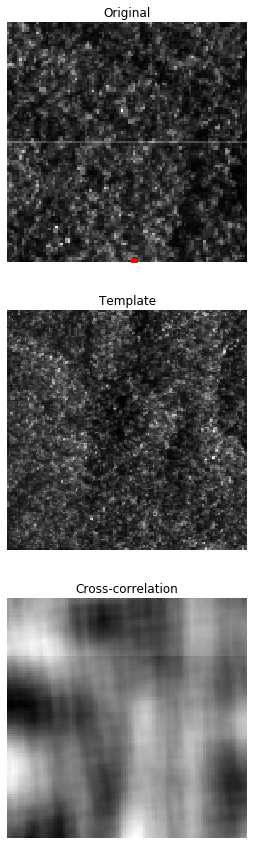

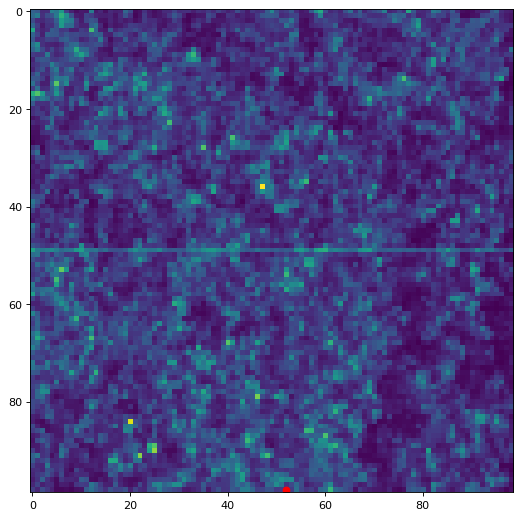

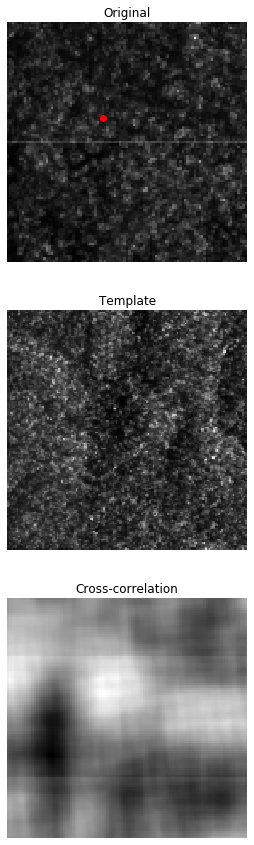

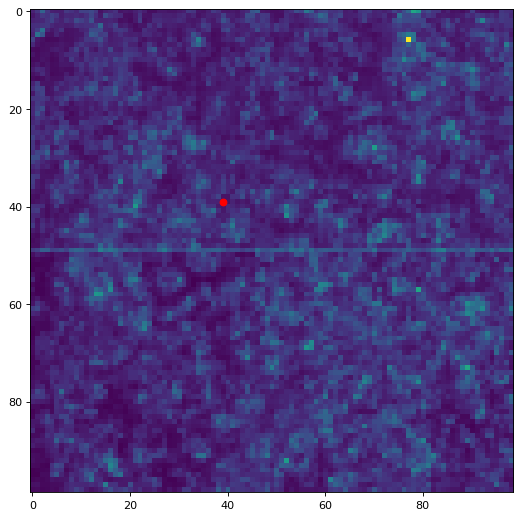

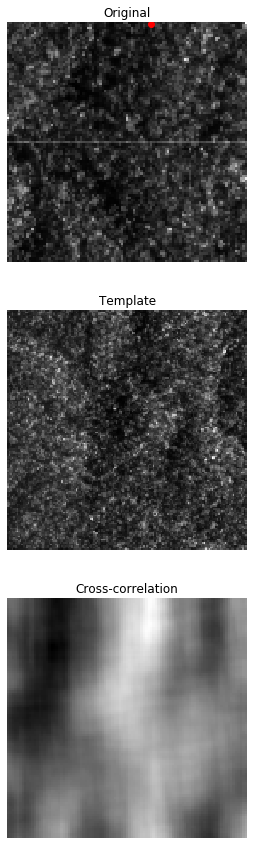

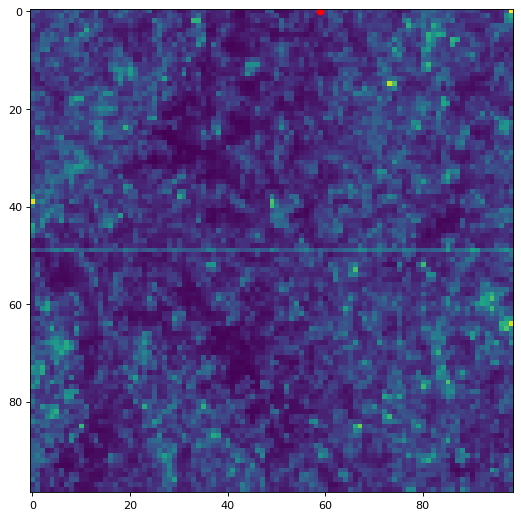

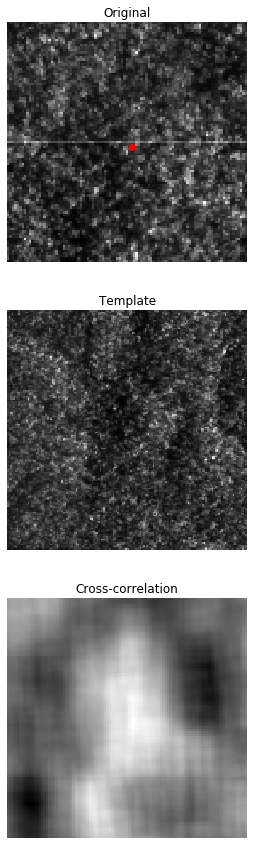

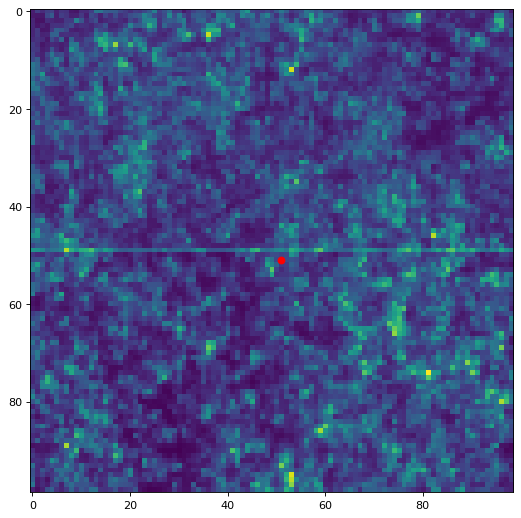

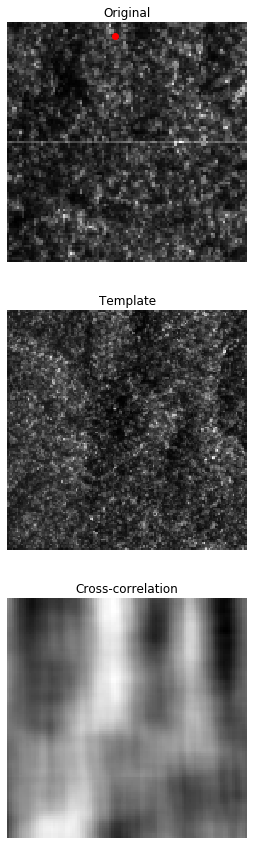

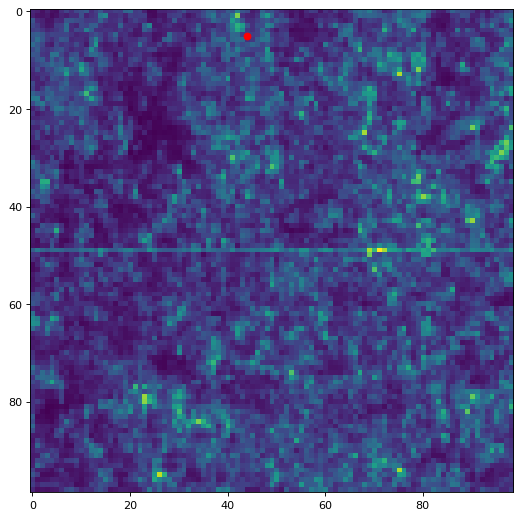

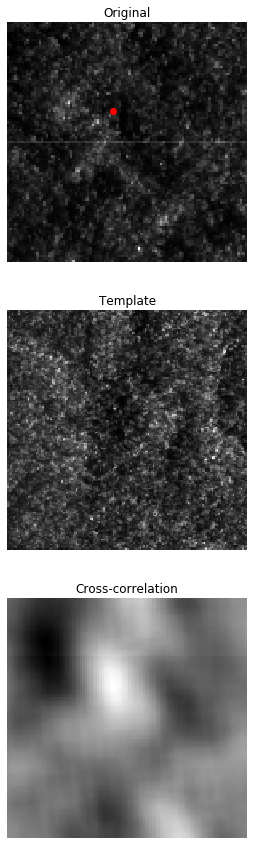

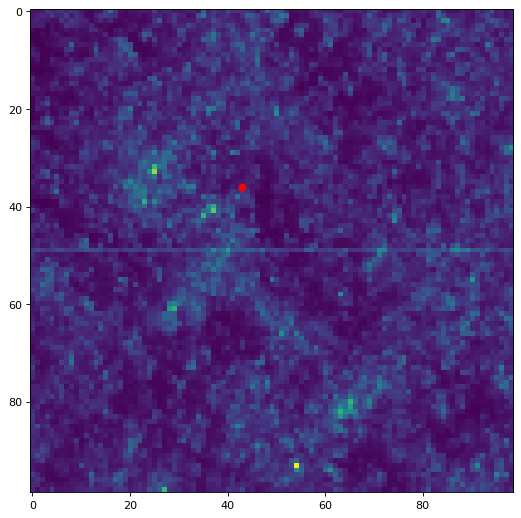

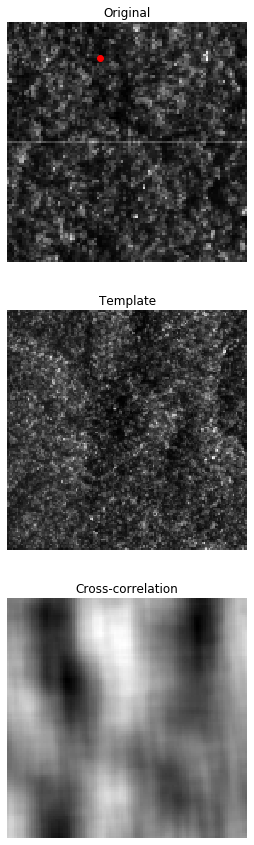

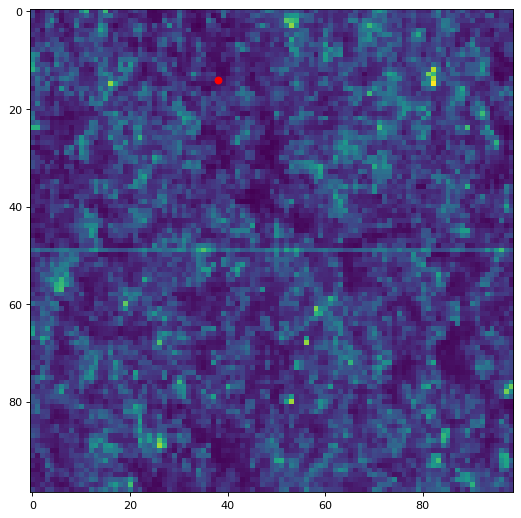

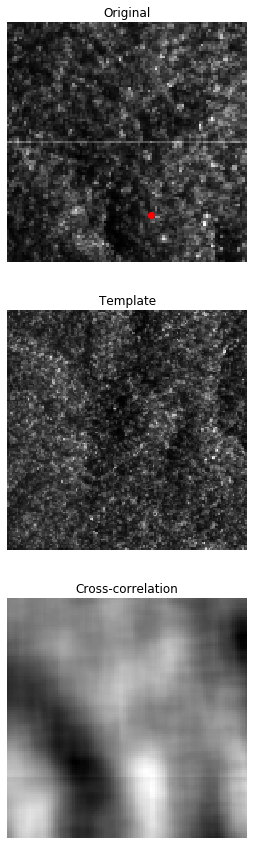

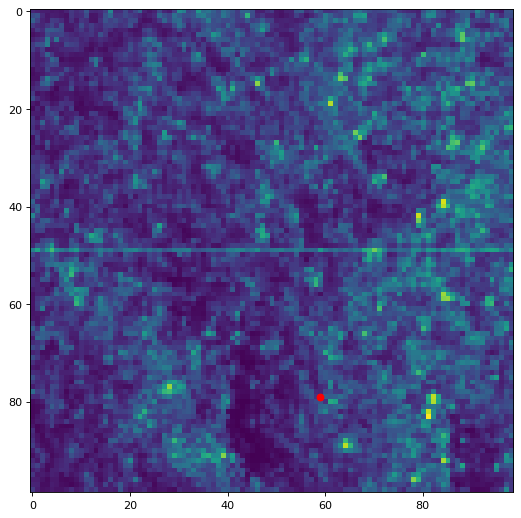

In [98]:
tabx,taby = decalageImg(bandr2,bandr1)


### Tendance : Ce graphe a une facheuse tendance

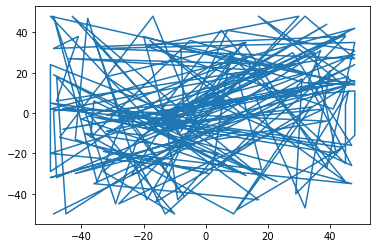

In [87]:
plt.plot(taby,tabx)